> ## 시각화 캐글 노트북 필사

In this notebook, we will try and explore the basic information about the dataset given. The dataset for this competition is a relational set of files describing customers' orders over time.


**Objective:**


The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sameple of over 3 million grocery orders from more than 200,000 Instacart users.

For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order

Let us start by importing the necessary modules.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # default='warn'

Let us list out the files that are present in this competition.!

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

d



Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then look at the top few rows.

In [3]:
order_products_train_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/order_products__train.csv")
order_products_prior_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/order_products__prior.csv")
orders_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/orders.csv")
products_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/products.csv")
aisles_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/aisles.csv")
departments_df = pd.read_csv("/kaggle/input/d/yoooobin/instacart-market-basket-analysis/departments.csv")

In [4]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


As we could see, orders.csv has all the information about the given id like the user who has purchased the order, when was it purchased, days since prior order and so on.

The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?

As mentioned earlier, in this dataset, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into the train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv. file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

Order_product*csv file has more detailed information about the products that been boutght in the given order along with the re-ordered status.

Let us first get the count of rows in each of the three sets.

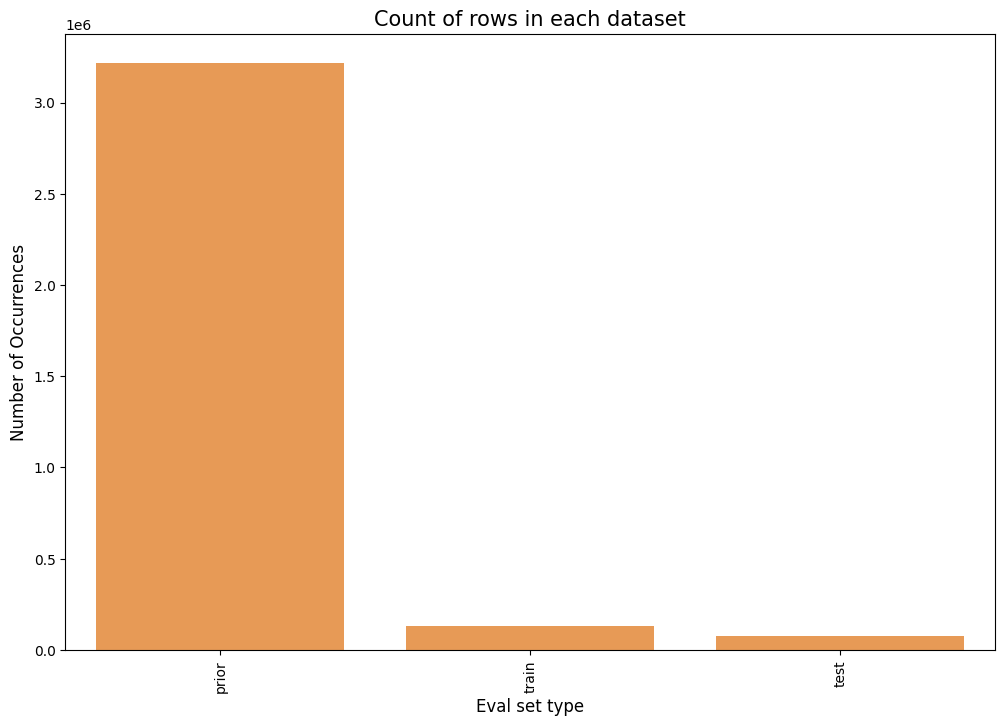

In [7]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.

Now let us validate the claim that 4 to 100 orders of a customer are given.

/tmp/ipykernel_18/558827441.py:1: FutureWarning: The provided callable <function max at 0x7ba2f3829360> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


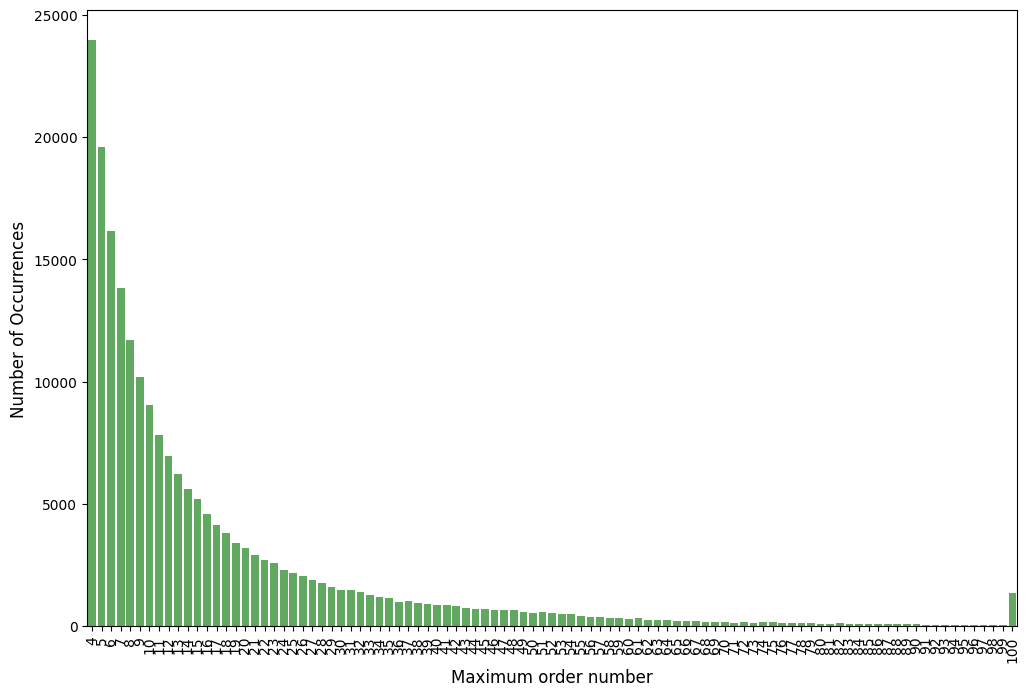

In [9]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max capped at 100 as given in the data page.

Now let us see how the ordering habit changes with day of week.

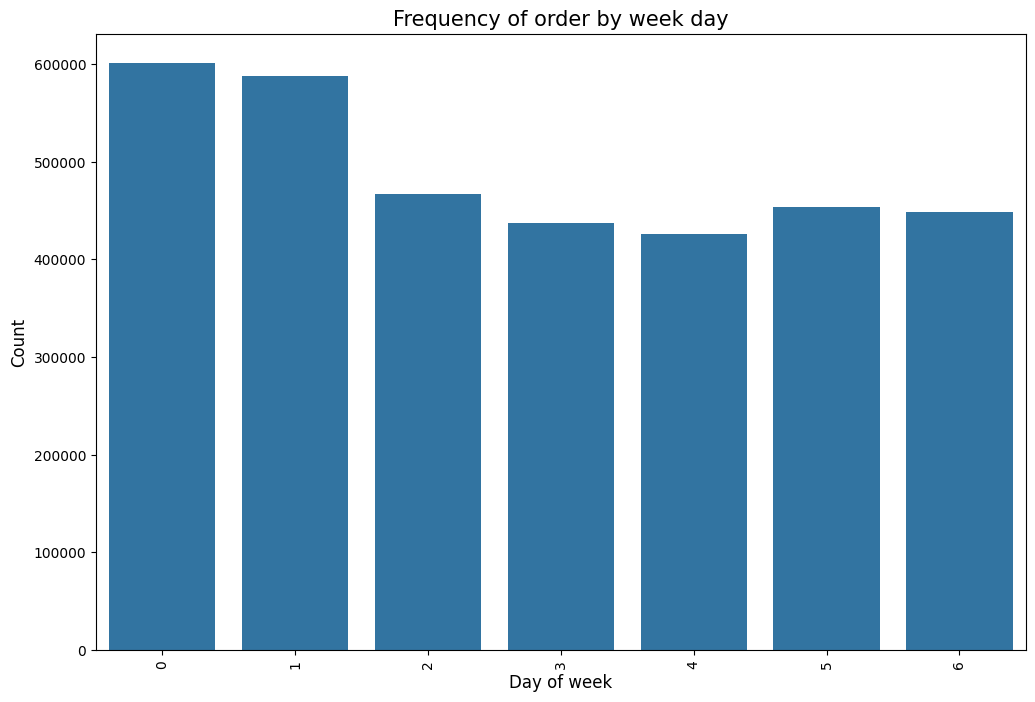

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 is Saturday and Sunday when the orders are high and low during Wednesday.

   Now we shall see how the distribution is with respect to time of the day.

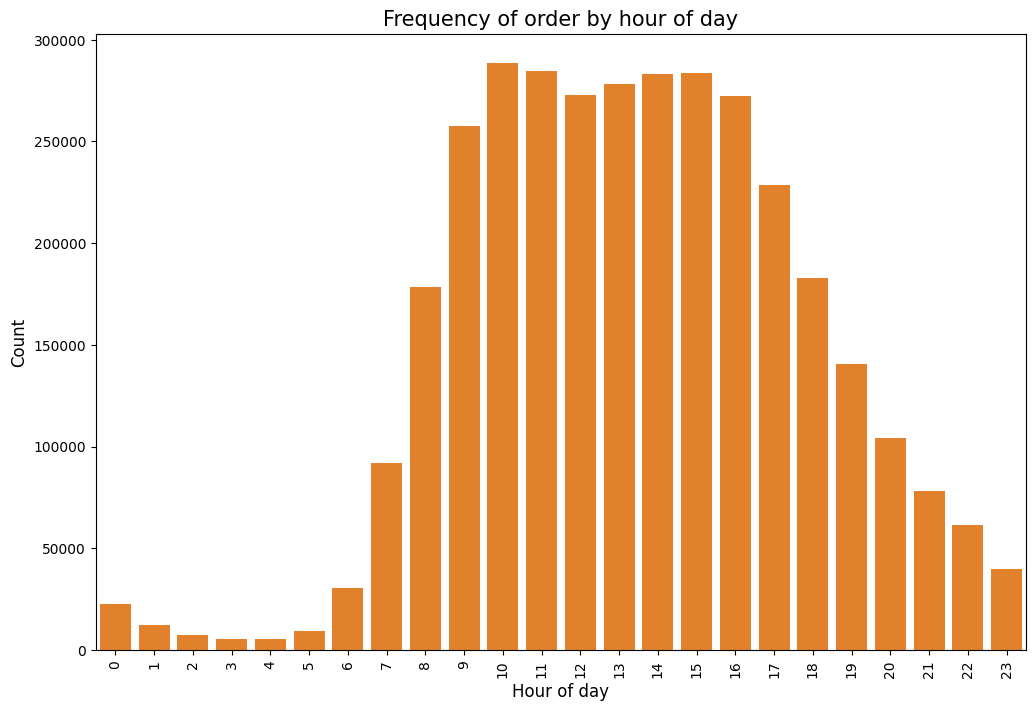

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during time. Now let us combine the day of week and hour of day to see the distribution.

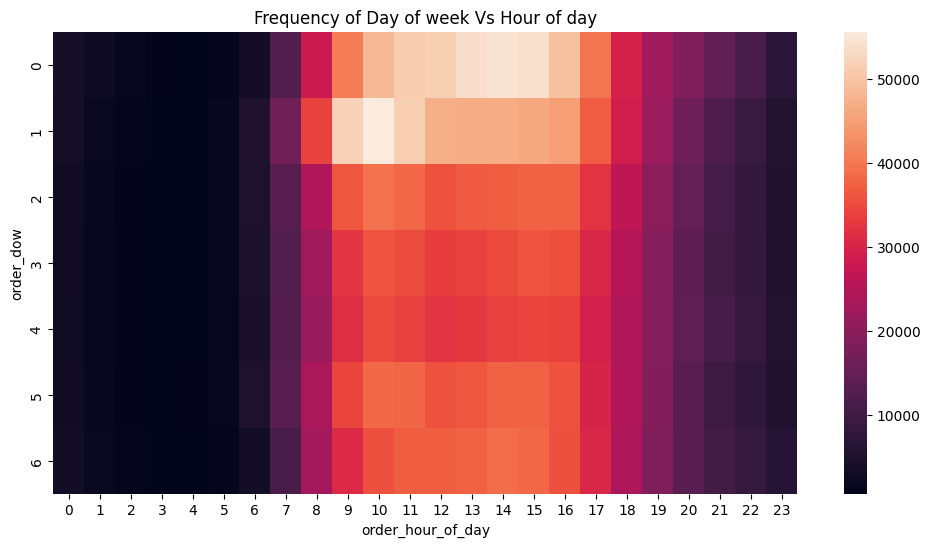

In [12]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Saturday evenings and Sunday mornings are the prime time for orders.
   

   Now let us check the time interval
between the orders.

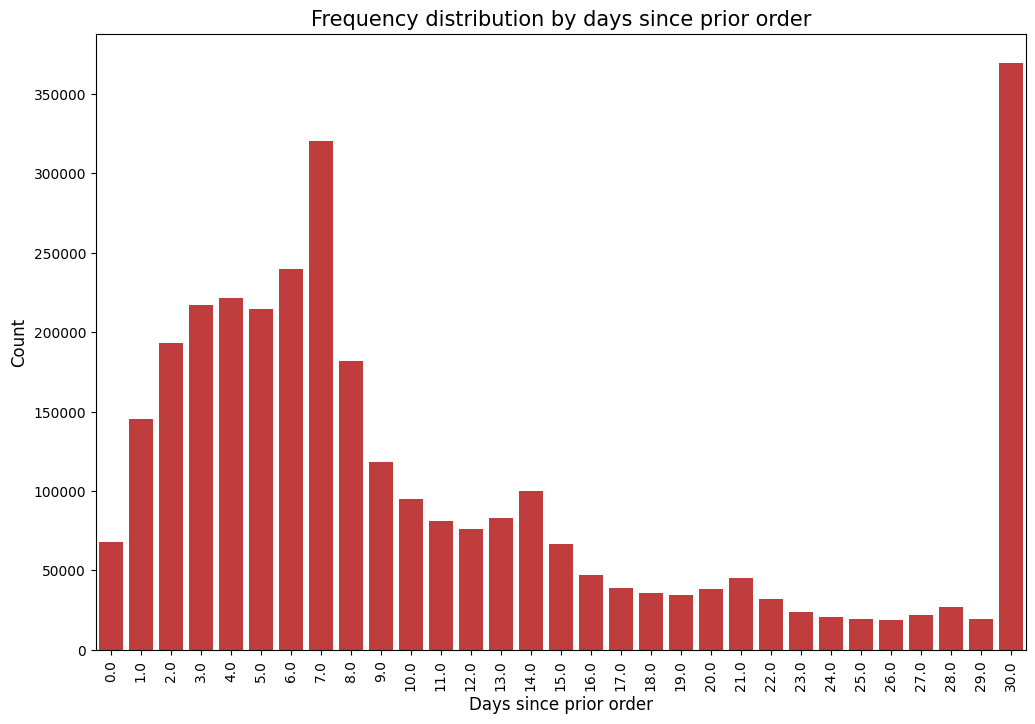

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Looks like customers order once in every week (check the peak at 7 days) or once in a month (peak at 30 days). We could also see smaller peaks at 14, 21 and 28 days (weekly intervals).


   Since our objective is to figure out the re-orders, let us check out the re-order percentage in prior set and train set.


In [14]:
# percentage of re-ordered in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.

**No re-ordered products:**

Now that we have seen 59% of the products are re-ordered, there will also be situations when none of the products are re-ordered. Let us check that now.

In [16]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

reordered
1    0.93444
0    0.06556
Name: count, dtype: float64

About 12% of the orders in prior set has no re-ordered items while in the train set it is 6.5%.

Now let us see the number of products bought in each order.

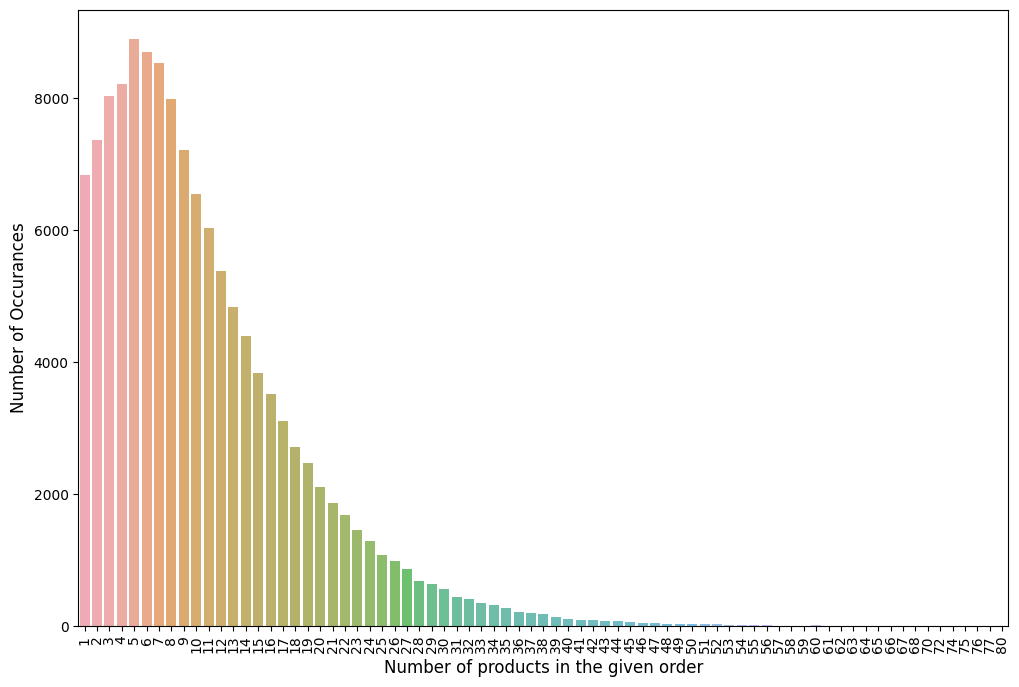

In [17]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurances', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

A right tailed distribution with the maximum value at 5.!

Before we explore the product details, let us look at the other three files as well.

In [18]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [19]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Now let us merge these product details with the order_prior details.

In [21]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [22]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


Wow. Most of them are organic products.! Also majority of them are fruits.

Now let us look at the important aisles.

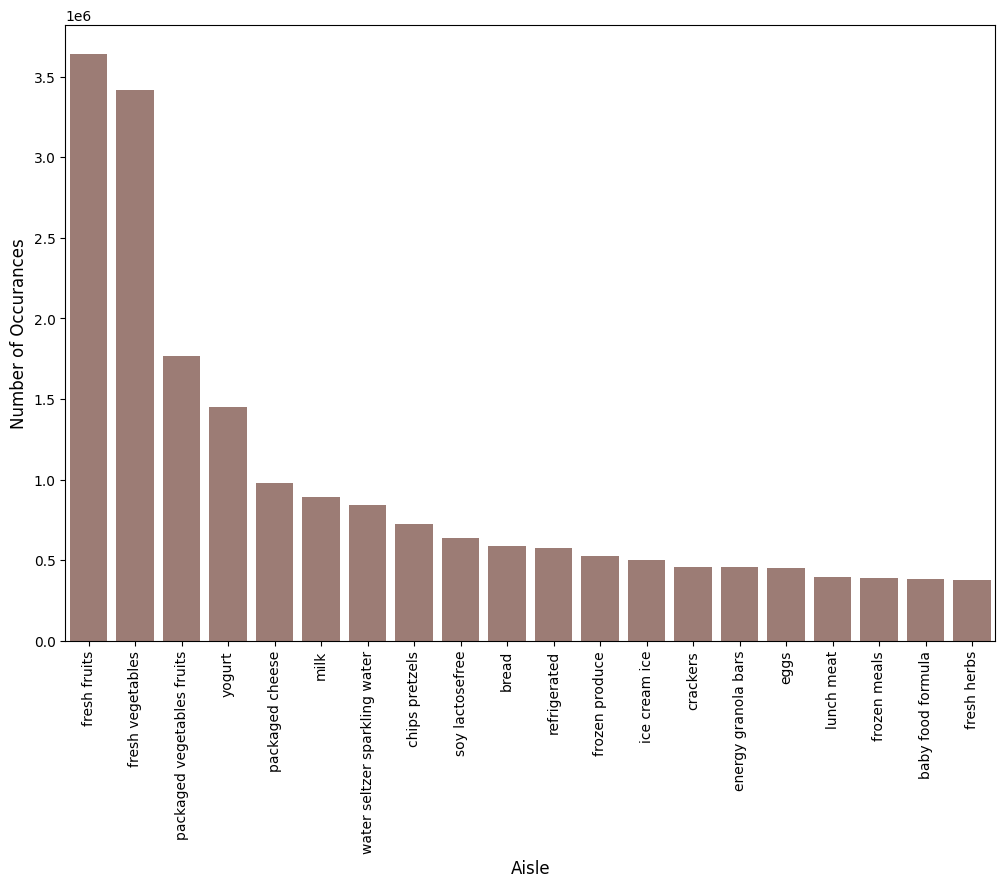

In [23]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurances', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top two aisles are fresh fruits and fresh vegetables.!

**Department Distribution:**

Let us now check the department wise distribution.

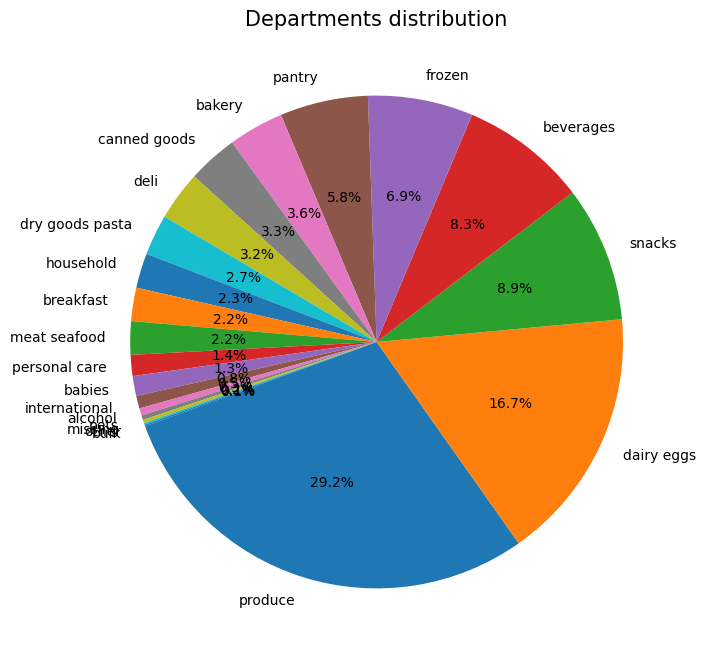

In [24]:
plt.figure(figsize=(12,8))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reordered percentage of each department.

**Department wise reorder ratio:**

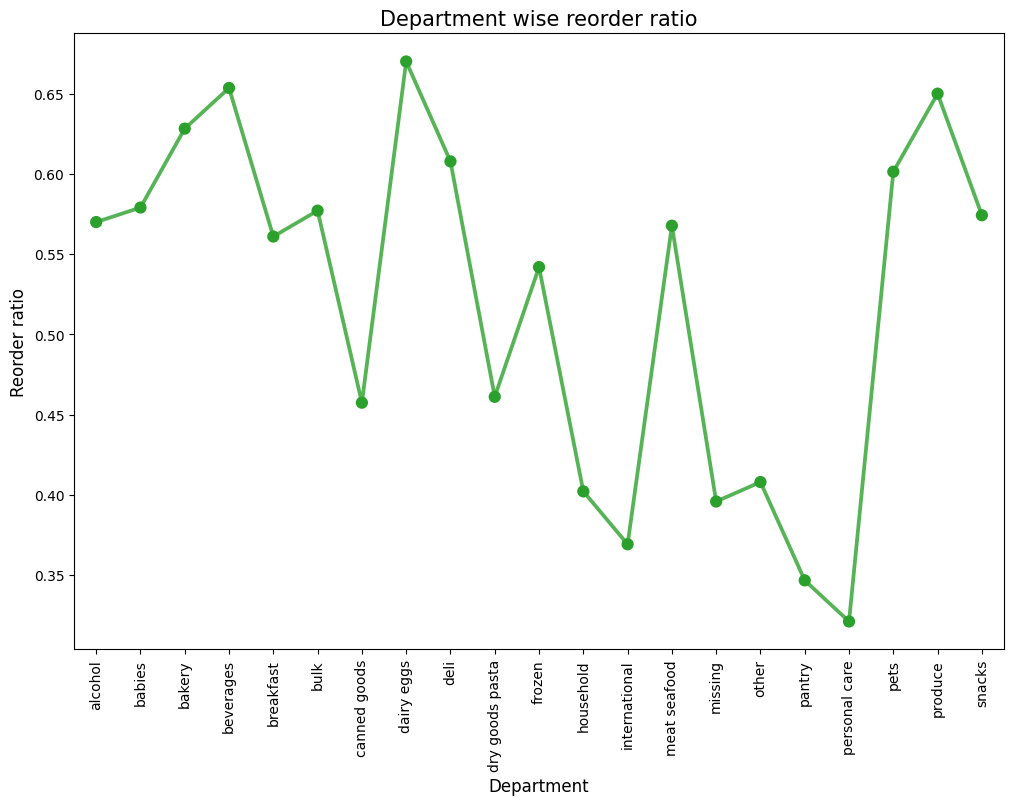

In [25]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, color=color[2])
plt.gca().lines[0].set_alpha(0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

**Aisle - Reorder ratio:**

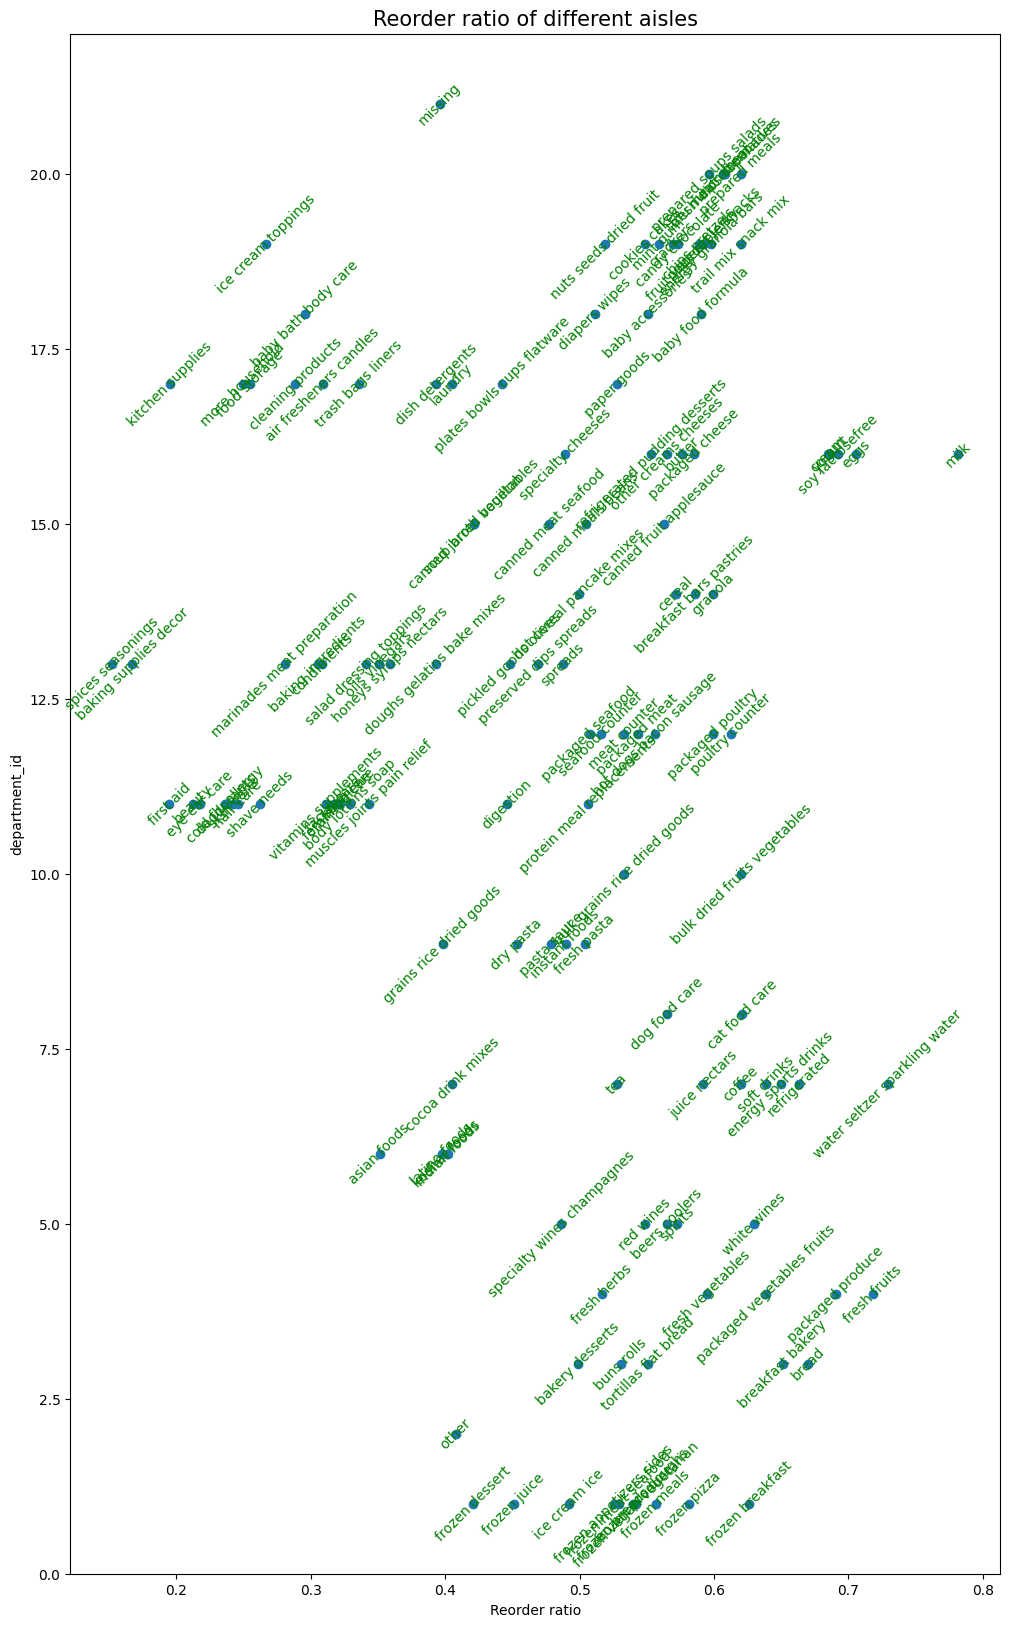

In [26]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

**Add to Cart - Reorder ratio:**

Let us now explore the relationship between how order of adding the product to the cart affects the reorder ratio.

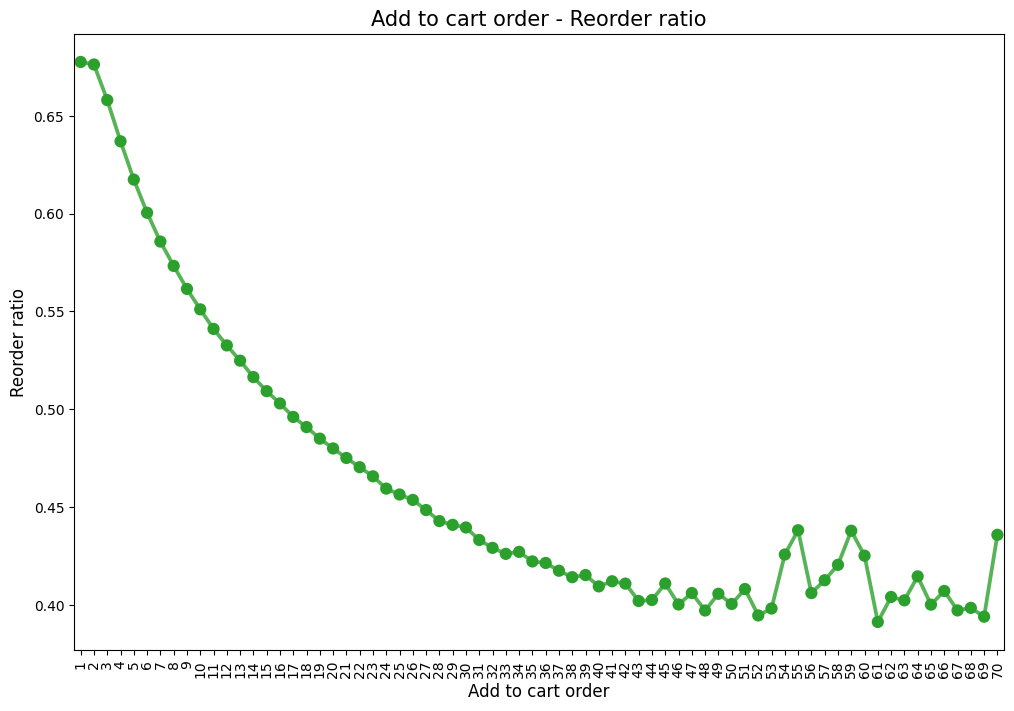

In [27]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df.loc[order_products_prior_df["add_to_cart_order_mod"] > 70, "add_to_cart_order_mod"] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()


plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, color=color[2])
plt.gca().lines[0].set_alpha(0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Looks like the products that are added to the cart initially are more likely to be reordered again compared to the ones added later. This makes sense to me as well since we tend to first order all the products we used to buy frequently and then look out for the new products available.

**Reorder ratio by Time based variables:**

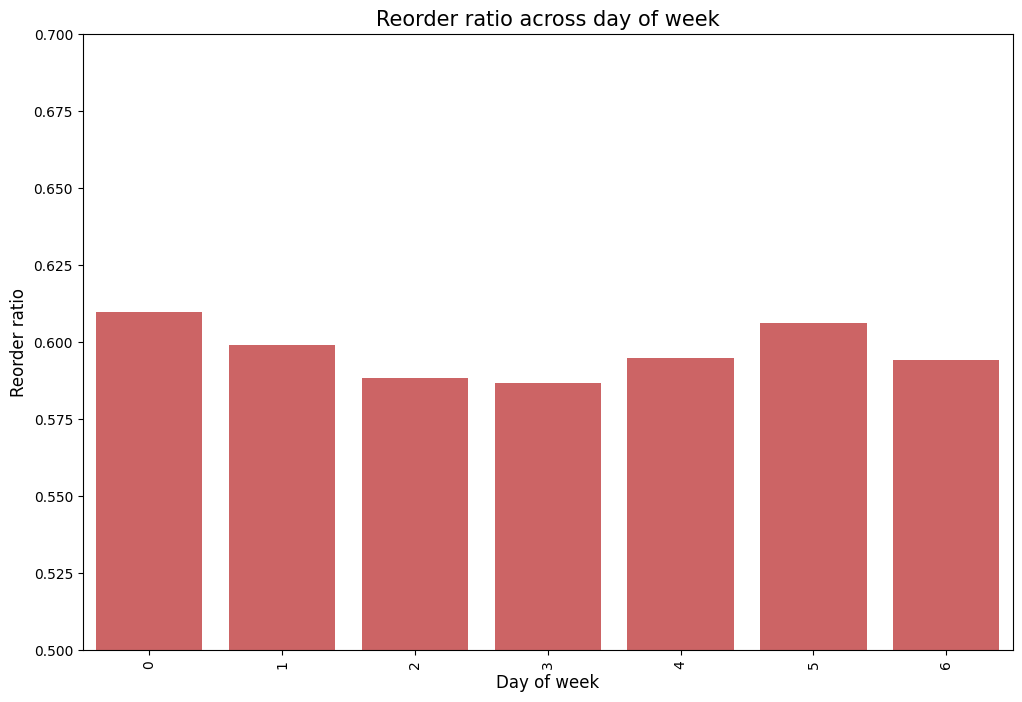

In [28]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_df['order_dow'], y=grouped_df['reordered'], color=color[3])
[bar.set_alpha(0.8) for bar in plt.gca().patches]
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

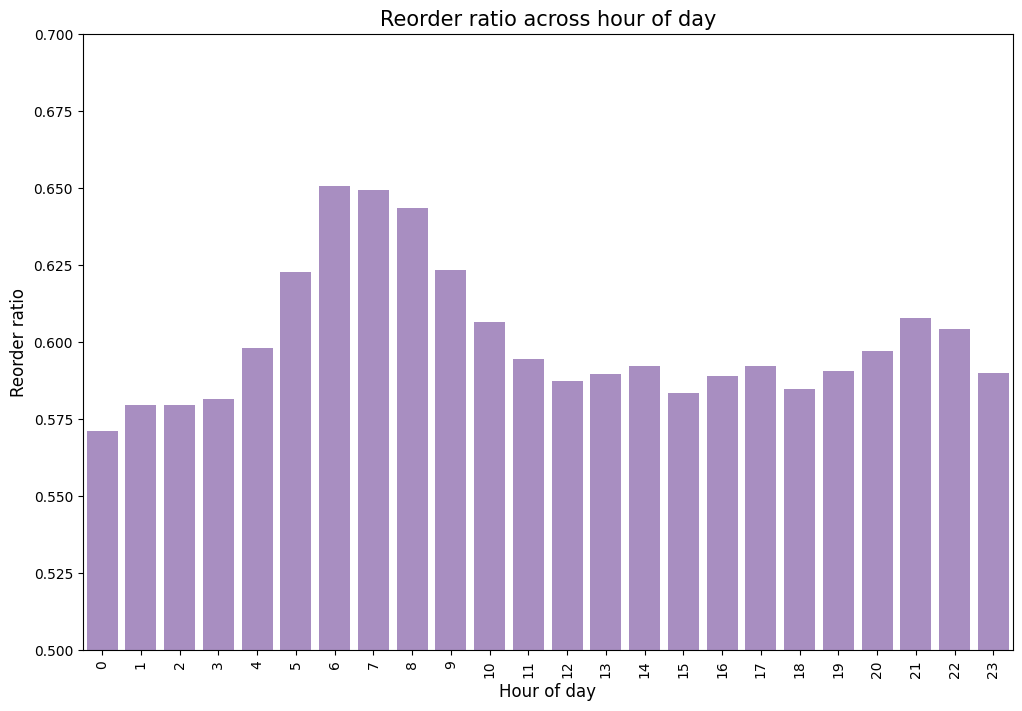

In [29]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_df['order_hour_of_day'], y=grouped_df['reordered'], color=color[4])
[bar.set_alpha(0.8) for bar in plt.gca().patches]
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

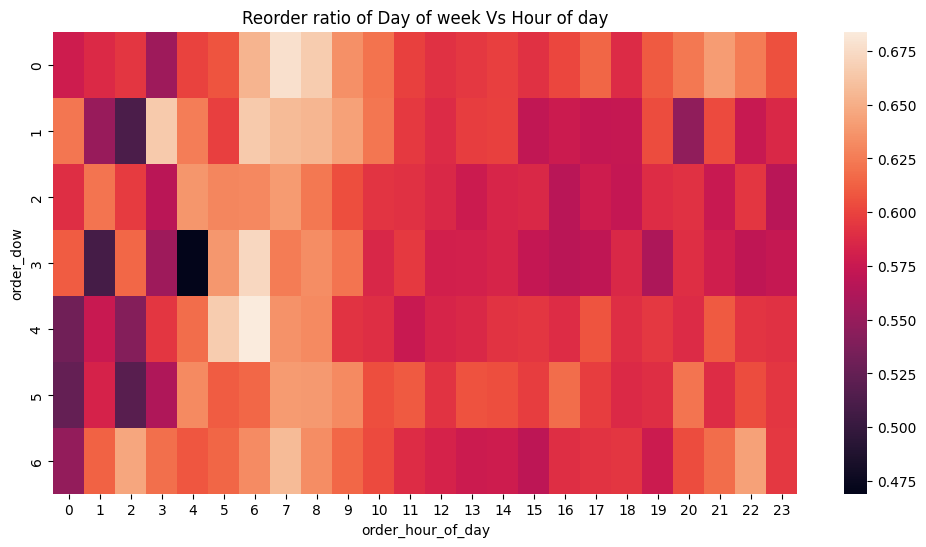

In [30]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot_table(index='order_dow', columns='order_hour_of_day', values='reordered', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df) 
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

 Looks like reorder ratios are quite high during the early mornings compared to later half of the day.

> #### 주문 요일과 시간대별 재주문 비율 계산 및 시각화 :

In [31]:
# 'order_dow'와 'order_hour_of_day' 별로 재주문 비율 계산
grouped_df = order_products_train_df.groupby("order_id")["reordered"].mean().reset_index()
orders_with_reorder = pd.merge(orders_df, grouped_df, on="order_id")
# 'order_dow'와 'order_hour_of_day' 별로 비율 계산
grouped_time_dow = orders_with_reorder.groupby(["order_dow", "order_hour_of_day"])["reordered"].mean().reset_index()
# 피벗 테이블로 요일과 시간대별로 재구성
pivot_table = grouped_time_dow.pivot(index="order_dow", columns="order_hour_of_day", values="reordered")

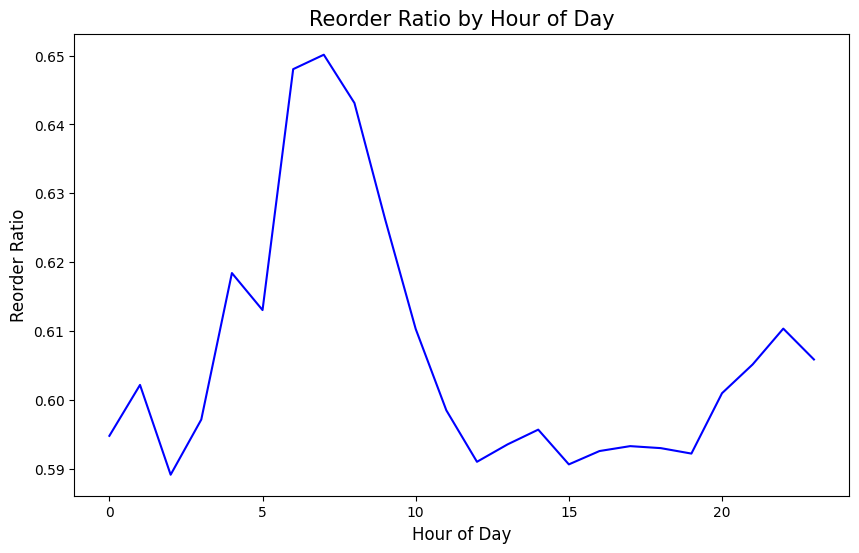

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 시간대별 평균 재주문 비율 계산
hour_reorder_ratio = orders_with_reorder.groupby("order_hour_of_day")["reordered"].mean().reset_index()
# matplotlib의 figure 객체에 대한 사이즈 설정
plt.figure(figsize=(10, 6))
# seaborn을 이용하여 선형 그래플 생성
# x축에는 'order_hour_of_day' 컬럼의 값을, y축에는 'reordered' 컬럼의 값
sns.lineplot(x="order_hour_of_day", y="reordered", data=hour_reorder_ratio, color='b')
plt.title("Reorder Ratio by Hour of Day", fontsize=15)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Reorder Ratio", fontsize=12)
plt.show()

**순서**
1. 'order_dow'와 'order_hour_of_day' 별로 재주문 비율 계산
2. orders_df와 합치기
3. 'order_dow'와 'order_hour_of_day' 별로 비율 계산
4. 피벗 테이블로 시간대별로 재구성

- **목적**: 시간대별로 고객들의 재주문 비율이 어떻게 달라지는지 파악 가능
- **해석**: 새벽(특히 5시-6시)과 저녁 시간대(20시-22시)에 재주문이 높고, 낮 시간대(9시~12시)에는 상대적으로 낮은 재주문 비율을 보임

**코드 개념 정리**
- pivot( ): 데이터를 행과 열로 변환하여 특정 값을 구성하는 함수
- index: 피벗 테이블에서 행을 구성하는 값
- columns: 피벗 테이블에서 열을 구성하는 값
- pd.merge( ): 두 데이터프레임을 특정 열을 기준으로 병합하는 함수
- groupby( ): 두 개 이상의 열을 기준으로 데이터를 그룹화하여 집계
- reset_index( ): 그룹화 후 생성된 인덱스를 데이터프레임 형식으로 되돌림
- bar.set_alpha( ): 막대 그래프의 투명도(alpha)를 설정하는 메서도

*seaborn*
- sns.lineplot( ): 선형 그래프 그리는 함수
- sns.heatmap( ): 열 지도를 그리는 함수 - 2차원 데이터 색상으로 시각화
- sns.barplot( ): 막대 그래프 그리는 함수(주로 범주형 데이터)
- sns.countplot( ): 빈도 그래프 그리는 함수(범주형 데이터)
- sns.pointplot( ): 포인트 그래프 그리는 함수 - 점으로 시각화(범주형 데이터)

*matplotlib*
- ax.scatter( ): 산점도 그리는 함수
- ax.annotate( ): 주석 추가하는 함수 - 특정 데이터 포인트에 텍스트 표시
- plt.pie( ): 원형 차트 그리는 함수